<span style="color:crimson; font-size:25px">***Introduction***</span>

In this repo, I aim to analyze data from different sources (The World Bank, The World Happiness Report, etc..) to answer the age-old question: does wealth really make you happier?

In this Notebook, we will be analyzing data from The World Bank on **GDP per capita Purchasing Power Adjusted** (PPP) (which will be used as a proxy for average wealth in a country) and Ladder Scores by country from the WHR. The ladder score will represent the subjective happiness in each country, this score is acquired through a survey that asks *How satisfied are you with your life on a scale of 1-10?*, this survey is conducted on roughly **150,000+** participants in 138 countries. All the sources for the data will be linked in the README.

**Small Note**: The data used for GDP per capita is adjusted for purchasing power, that way it can be a more accurate representation of actual wealth in each country. As such, many of the values you will see for GDP per capita will be higher than you would expect.

<span style="color:red">**Important:**</span>
Please note that there are some flaws to this analysis, flaws that I will address at the end of this Notebook.

Now, let's get started!

In [3]:
#Importing the neccessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

First, let's read in the data acquired from the World Bank on GDP Per Capita. 

We notice that the data contains information on GDP Per Capita from 1960 to 2024. On top of that, both the oldest and newest data points have missing info on many countries. So, let's take a look at how many countries are missing from the last 10 years' data (last 10 years because we want the data to be as up-to-date as possible.)

In [4]:
data = pd.read_csv("Data/World Bank GDP Per Capita.csv")
data.isna().sum()[-11:]

2015            19
2016            20
2017            19
2018            19
2019            19
2020            19
2021            19
2022            19
2023            21
2024            34
Unnamed: 69    266
dtype: int64

We are looking for a data point that is the most recent but also does not contain many empty rows, thus, it seems that the most optimal year is 2023, seeing as it is the 2nd most recent and also contains only 21 empty rows.

Now, let's load in data from the World Happiness Report from the year 2023. The data we're interested in specifically is  the Ladder Score data (for more info, check out the README) and merge that with the GDP per capita data.

In [5]:
data = data[['2023','Country']]
happiness_data = pd.read_csv("Data/WHR2023.csv")
happiness_data = happiness_data[['Country','Ladder Score']]
merged = data.merge(happiness_data, on='Country')
merged

,2023,Country,Ladder Score
0,2201.722907,Afghanistan,1.859
1,21259.797781,Albania,5.277
2,76110.384842,United Arab Emirates,6.571
3,30082.304525,Argentina,6.024
4,21534.030536,Armenia,5.342
...,...,...,...
117,11106.971593,Uzbekistan,6.014
118,15804.406575,Kosovo,6.368
119,15194.199176,South Africa,5.275
120,4076.995087,Zambia,3.982


In [6]:
#Important statistical info we will use later.
merged.describe()

,2023,Ladder Score
count,122.000000,122.000000
mean,31665.602106,5.584500
std,29619.444238,1.164471
min,1677.681023,1.859000
25%,7747.306901,4.659500
50%,21217.708240,5.778000
75%,50660.308784,6.395750
max,143786.136293,7.804000


<span style="color:#9333ea; font-size:22px">**Scatter plot**</span>

In order to get a better understanding of our data beyond the simple statistical info, we will plot the graph of the Ladder (Happiness) Score per country in 2023 as a function of the GDP per Capita per country in the same year.

After that, we will do a more numerical analysis to confirm what we have visually interpreted from the graph.

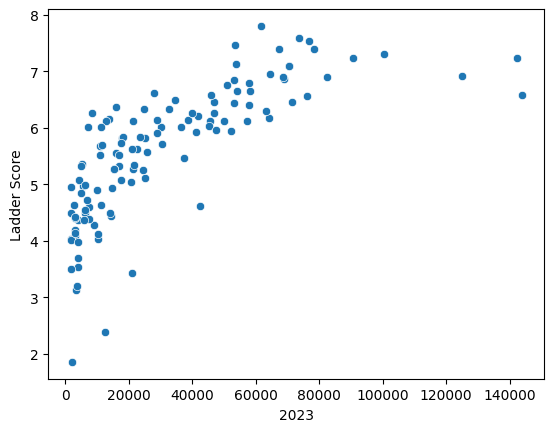

In [7]:
sns.scatterplot(data=merged,x='2023',y='Ladder Score')
plt.show()

Upon inspection of the graph, we notice it looks like a **log (logarithm) function**. With a fast growth near the left side of the graph that slows down as the GDP per capita increases, with a couple of the ultra-wealthy countries seeming to be **less happy** than the countries right below them in wealth.

We'll talk more about the implications of this plot after we analyze the data numerically.

<span style="color:#9333ea; font-size:22px">**Numerical Analysis**</span>

Let's start by looking at the correlation between the Ladder Score and GDP Per Capita, once for all the countries, and another time for all the countries in the top 75% of wealth.

In [8]:
merged.drop(columns='Country').corr()

,2023,Ladder Score
2023,1.000000,0.745276
Ladder Score,0.745276,1.000000


In [9]:
merged[merged['2023'] > 50660].drop(columns='Country').corr()

,2023,Ladder Score
2023,1.000000,0.201809
Ladder Score,0.201809,1.000000


We notice there is a moderately strong **74%** total correlation between GDP per capita and the Ladder Score if we look at all countries. This corelation drops down to only **20%** for countries in the top 75% of wealth, seeming to confirm the **logarithmic relation between wealth and happiness.**

Now, let's do one *final* thing to confirm the logarithmic relationship between GDP per capita and the Ladder Score, we'll add a column to the merged DataFrame called the *log_gdp* column.

As the name implies, this column will contain the *logarithm of the GDP per capita* for each country. We will plot the Ladder Score as a function of the log_gdp column, and we will look at the correlation between them.

In [10]:
merged['log_gdp']=np.log(merged['2023'])
merged

,2023,Country,Ladder Score,log_gdp
0,2201.722907,Afghanistan,1.859,7.696995
1,21259.797781,Albania,5.277,9.964573
2,76110.384842,United Arab Emirates,6.571,11.239940
3,30082.304525,Argentina,6.024,10.311692
4,21534.030536,Armenia,5.342,9.977390
...,...,...,...,...
117,11106.971593,Uzbekistan,6.014,9.315328
118,15804.406575,Kosovo,6.368,9.668044
119,15194.199176,South Africa,5.275,9.628669
120,4076.995087,Zambia,3.982,8.313115


<span style="color:#9333ea; font-size:22px">**Scatter Plot 2**</span>

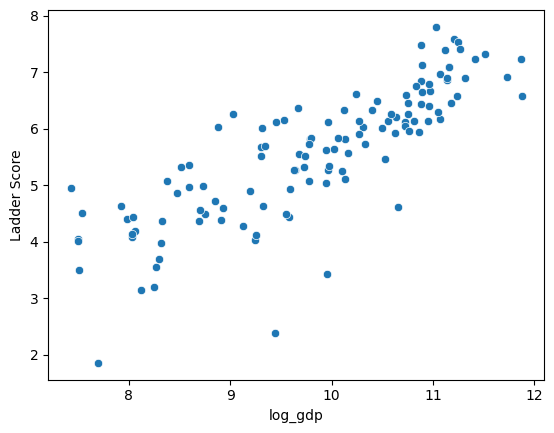

In [11]:
sns.scatterplot(data=merged,x='log_gdp',y='Ladder Score')
plt.show()

In [12]:
log_df = merged.drop(columns=['Country','2023'])
log_df.describe()

,Ladder Score,log_gdp
count,122.000000,122.000000
mean,5.584500,9.840343
std,1.164471,1.139719
min,1.859000,7.425168
25%,4.659500,8.954218
50%,5.778000,9.962589
75%,6.395750,10.832860
max,7.804000,11.876082


In [13]:
log_df.corr()

,Ladder Score,log_gdp
Ladder Score,1.000000,0.822486
log_gdp,0.822486,1.000000


The plot of the Ladder Score as a function of the log of the GDP per capita looks like a straight line. On top of that, the linear correlation between the Ladder Score and the log_gdp columns is equal to **0.822**.

This confirms the **logarithmic relationship** between the GDP per capita and the happiness scores.

Before we reach the conclusion, I would simply like to display the countries that are in the bottom 50% in ascending order and the countries in the top 25% also in ascending order, as this will be helpful later on.

In [14]:
merged[merged['2023']<21217].groupby("Ladder Score").max()

,2023,Country,log_gdp
Ladder Score,,,
1.859,2201.722907,Afghanistan,7.696995
2.392,12574.832912,Lebanon,9.439453
3.138,3371.347542,Sierra Leone,8.123068
3.204,3820.359922,Zimbabwe,8.248100
3.435,21012.103197,Botswana,9.952854
...,...,...,...
6.122,12679.576875,El Salvador,9.447748
6.125,21175.618699,Brazil,9.960606
6.150,13745.362593,Guatemala,9.528457


In [18]:
merged[merged['2023']>50000].groupby("Ladder Score").max()


,2023,Country,log_gdp
Ladder Score,,,
5.951,52203.968566,South Korea,10.862914
6.130,57204.585938,Cyprus,10.954389
6.173,64171.085736,Bahrain,11.069308
6.300,63074.748732,Malta,11.052076
6.405,57893.408359,Italy,10.966359
6.436,53229.922022,Spain,10.882376
6.463,71564.800029,Saudi Arabia,11.178359
6.571,76110.384842,United Arab Emirates,11.239940
6.587,143786.136293,Singapore,11.876082


<span style="color:crimson; font-size:25px">***Conclusion***</span>

The logarithmic nature of the relationship between wealth and happiness seems to indicate that, while living in a country with higher wealth means you are likely happier, there are **diminishing returns** to the increased happiness for the ultra-wealthy countries. As a matter of fact, we see that the richest countries in the world are **not** the happiest.

It would seem as though past a certain point of wealth, getting wealthier makes you **less happy** (though this can't be confirmed as the sample size of ultra-wealthy countries is far too small to make any generalizations).

On top of that, the **moderately strong 74% correlation** between wealth and happiness seems to indicate that more money really might lead to more happiness, especially for those who aren't already wealthy.

However, that conclusion might be a bit hasty and inaccurate. **Correlation does not always mean causation**. It might be true that wealth really is the main driver of happiness, but it's more probable that there exists more important factors (that might have some sort of correlation with wealth) that are really the main drivers of happiness. Why do I think it's more probable?



Let's take a look at the list of the bottom 50% of countries in terms of wealth and the top 25% that we displayed just before the Conclusion section.

We notice the existence of a significant amount of unexpected outliers, like Nicaragua having a higher happiness score than South Korea despite South Korea being in the **top 25%** of wealth and Nicaragua being roughly in the **bottom 25%**. It isn't just these 2 outliers, but there are many more like them, you're free to explore the data and take note of each outlier.

The existence of these outliers seems to suggest the existence of other factors, we will explore these factors and what they might be in the next Notebook.

<span style="color:crimson; font-size:25px">***Methodological Flaws and Limitations***</span>

-While **GDP per capita** is widely used as an indicator of average wealth in countries, it isn't always the **most accurate** metric for this. As inequality of distribution of wealth in a country is not taken into account in GDP per capita data. However, other more accurate forms of data are simply not as widely available as GDP per capita is, and even when they are available, they're often in low sample sizes.

-While a sample size of **122** countries is respectable, it could be much higher if we had access to more data which could potentially impact the accuracy of this analysis.

-Surveys are not always the most accurate forms of data.

<span style="color:crimson; font-size:25px">***What's next?***</span>

In the next Notebook titled Analysis2, we will look at potential candidate factors and determine their correlation with happiness in an attempt to find the factor that has the most impact on happiness.